# Module 5 - Modern Portfolio Theory

   ### Welcome to the Answer notebook for Module 5 ! 
Make sure that you've submitted the module 4 notebook and unlocked Module 5 yourself before you start coding here


### Query 5.1 
5.1 For your chosen stock, calculate the mean daily return and daily standard deviation of returns, and then just annualise them to get mean expected annual return and volatility of that single stock. **( annual mean = daily mean * 252 , annual stdev = daily stdev * sqrt(252) )**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
SONATA_df = pd.read_csv(r'C:\Users\DELL\Desktop\Internship1\SONATSOFTW.csv')[['Date', 'Close Price']]
SONATA_df.columns = ['Date', 'SONATA Price']
SONATA_df['SONATA Returns'] = SONATA_df['SONATA Price'].pct_change()
SONATA_df.dropna(inplace = True)
SONATA_returns = round(np.mean(SONATA_df['SONATA Returns'])*252,2)
SONATA_volatality = round(np.std(SONATA_df['SONATA Returns'])*np.sqrt(252),2)

print(SONATA_returns,SONATA_volatality)    

0.46 0.4


The Annual Return and Volatality of the stocks of the company SONATA SOFTWARE are:

>Returns : 0.46

>Volatality : 0.4

### Query 5.2

5.2 Now, we need to diversify our portfolio. Build your own portfolio by choosing any 5 stocks, preferably of different sectors and different caps. Assume that all 5 have the same weightage, i.e. 20% . Now calculate the annual returns and volatility of the entire portfolio ( Hint : Don't forget to use the covariance )

In [19]:
PVR_df = pd.read_csv(r'C:\Users\DELL\Desktop\Internship1\PVR.csv')[['Date', 'Close Price']]
PVR_df.columns = ['Date', 'PVR Price']
PVR_df['PVR Returns'] = PVR_df['PVR Price'].pct_change()
PVR_df.dropna(inplace = True)
PVR_returns = round(np.mean(PVR_df['PVR Returns'])*252,2)
PVR_volatality = round(np.std(PVR_df['PVR Returns'])*np.sqrt(252),2)

print(PVR_returns,PVR_volatality)    

0.11 0.31


In [20]:
RELIANCE_df = pd.read_csv(r'C:\Users\DELL\Desktop\Internship1\RELIANCE.csv')[['Date', 'Close Price']]
RELIANCE_df.columns = ['Date', 'RELIANCE Price']
RELIANCE_df['RELIANCE Returns'] = RELIANCE_df['RELIANCE Price'].pct_change()
RELIANCE_df.dropna(inplace = True)
RELIANCE_returns = round(np.mean(RELIANCE_df['RELIANCE Returns'])*252,2)
RELIANCE_volatality = round(np.std(RELIANCE_df['RELIANCE Returns'])*np.sqrt(252),2)

print(RELIANCE_returns,RELIANCE_volatality)    

0.09 0.44


In [24]:
RAYMOND_df = pd.read_csv(r'C:\Users\DELL\Desktop\Internship1\RAYMOND.csv')[['Date', 'Close Price']]
RAYMOND_df.columns = ['Date', 'RAYMOND Price']
RAYMOND_df['RAYMOND Returns'] = RAYMOND_df['RAYMOND Price'].pct_change()
RAYMOND_df.dropna(inplace = True)
RAYMOND_returns = round(np.mean(RAYMOND_df['RAYMOND Returns'])*252,2)
RAYMOND_volatality = round(np.std(RAYMOND_df['RAYMOND Returns'])*np.sqrt(252),2)

print(RAYMOND_returns,RAYMOND_volatality)   

0.07 0.36


In [26]:
PNB_df = pd.read_csv(r'C:\Users\DELL\Desktop\Internship1\PNB.csv')[['Date', 'Close Price']]
PNB_df.columns = ['Date', 'PNB Price']
PNB_df['PNB Returns'] = PNB_df['PNB Price'].pct_change()
PNB_df.dropna(inplace = True)
PNB_returns = round(np.mean(PNB_df['PNB Returns'])*252,2)
PNB_volatality = round(np.std(PNB_df['PNB Returns'])*np.sqrt(252),2)

print(PNB_returns,PNB_volatality)   

-0.24 0.54


The Annual Returns and Volatality for the chosen Companies are :

>PVR : 0.11 ; 0.31

>RELIANCE : 0.09 ; 0.44

>RAYMOND : 0.07 ; 0.36

>PNB : -0.24 ; 0.54

>SONATA SOFTWARE : 0.46 ; 0.4

In [41]:
portfolio_df = PNB_df.merge(RAYMOND_df, how = 'inner', left_on = 'Date', right_on = 'Date')[['Date', 'PNB Price', 'RAYMOND Price']]
portfolio_df = portfolio_df.merge(SONATA_df, how = 'inner', left_on = 'Date', right_on = 'Date')[['Date', 'PNB Price', 'RAYMOND Price', 'SONATA Price']]
portfolio_df = portfolio_df.merge(PVR_df, how = 'inner',  left_on = 'Date', right_on = 'Date')[['Date', 'PNB Price', 'RAYMOND Price', 'SONATA Price', 'PVR Price']]
portfolio_df = portfolio_df.merge(RELIANCE_df, how = 'inner',  left_on = 'Date', right_on = 'Date')[['Date', 'PNB Price', 'RAYMOND Price', 'SONATA Price', 'PVR Price' ,'RELIANCE Price']]

In [54]:
weights = np.asarray([.2,.2,.2,.2,.2])

returns = portfolio_df.drop(['Date'], axis = 1).pct_change().dropna()
cov_matrix = returns.cov()

mean_daily_return = returns.mean()

In [64]:
portfolio_returns = round(np.sum(mean_daily_return*weights*252),3)
portfolio_std_dev = round(np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252),2)

print(portfolio_returns, portfolio_std_dev)

0.091 0.24


The Annual Return and Volatality of the entire portfolio is:

>Return = 0.091

>Volatality = 0.24

### Query 5.3 & Query 5.4

5.3 Prepare a scatter plot for differing weights of the individual stocks in the portfolio , the axes being the returns and volatility. Colour the data points based on the Sharpe Ratio ( Returns/Volatility) of that particular portfolio.

5.4 Mark the 2 portfolios where -
Portfolio 1 - The Sharpe ratio is the highest
Portfolio 2 - The volatility is the lowest. 

In [81]:
num_portfolios = 25000
stocks = ['PNB', 'RAYMOND' , 'SONATA' , 'PVR' , 'RELIANCE']

results = np.zeros((4+len(stocks)-1,num_portfolios))

for i in range(num_portfolios):
    
    weights = np.array(np.random.random(5))

    weights /= np.sum(weights)
    
    portfolio_return = np.sum(mean_daily_return * weights) * 252
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252)
    
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev

    results[2,i] = results[0,i] / results[1,i]

    for j in range(len(weights)):
        results[j+3,i] = weights[j]

results_frame = pd.DataFrame(results.T,columns=['ret','stdev','sharpe',stocks[0],stocks[1],stocks[2],stocks[3],stocks[4]])

max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()]

min_vol_port = results_frame.iloc[results_frame['stdev'].idxmin()]

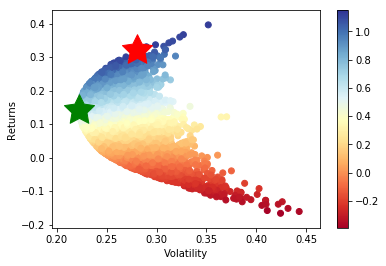

In [82]:
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar()

plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='r',s=1000)

plt.scatter(min_vol_port[1],min_vol_port[0],marker=(5,1,0),color='g',s=1000)